### Monte Carlo (Risk) simulations

Using Monte Carlo simulations (based on a normal distribution of returns and std dev) to simulate possible future stock price

$\textbf{So what?}$

Provides a confidence level of the movement of a security based on m-random walks and n-evolutions using historical mean and std deviation. 

$\textbf{Key Takeaways}$ <br>
~~1. A Monte Carlo simulation is a model used to predict the probability of different outcomes when the intervention of random variables is present.~~ <br>
2. Monte Carlo simulations help to explain the impact of risk and uncertainty in prediction and forecasting models.<br>
3. A variety of fields utilize Monte Carlo simulations, including finance, engineering, supply chain, and science.<br>
4. The basis of a Monte Carlo simulation involves assigning multiple values to an uncertain variable to achieve multiple results and then to average the results to obtain an estimate.<br>
5. Monte Carlo simulations assume perfectly efficient(?) markets.<br>

$\textbf{Limitations}$ <br>

May require predicates to remove systemic shocks to the system

$\textbf{Methodologys}$

$$
\frac{Price \, Today}{Price \, Yesterday} = e^{r}
$$
r : is the expected lg returns that is modelled with brownian motion <br>
r = drift + volatility(random value)

Available data: Price yesterday
Model: Using Brownian motion to model r (using drift and volatility) - (to be cross checked)
this creates a distribution providing an upper and lower bound

$\textbf{Brownian motion}$

Brownian motion can be described by the drift and volatility:

1. Drift
Describes the direction rates of return have been headed in the past <br>
Definition: The expected daily return of stock <br>
How: Calculate the average(or expectation?), standard deviation and variance of daily returns in the historical period

$$
Drift = ( \mu - (c) (\sigma^2))
$$
<center>$\mu$ is the average daily returns(?) <br>
c is a random decomposition constant <br>
$\sigma^2$ is the variance <br> </center>
2. Volatility
    
$$
Randon Variable = \mu \times Z (Rand(0;1))
$$

$\mu$ is the historical volatility (std deviation)
Z of a random percentage -> generate a random probability ---??? why a normal distribution over a the historical std dev? correct(?)

References:
* https://www.investopedia.com/articles/07/montecarlo.asp
* why log returns: https://quantivity.wordpress.com/2011/02/21/why-log-returns/
* Brownian motion: https://en.wikipedia.org/wiki/Brownian_motion


$\textbf{Work on/Questions}$
* [Backtest] Need to study the effectiveness of this model by choosing 5 companies and comparing the distribution of the random walk to final share price
* Share price simulation
* Corporate finance budgeting for EBITA (Development of revenue, Cost of Good Sold(COGS), Operating expenses)
* Stock option price simulations combining Monte Carlo with Black-Scholes-Merton
*  

$\textbf{Project}$
1. Probablity of future defects based on past defect mean and variance to estimate cost to company 

#### Import packages & API data

In [1]:
#Package import
import numpy as np #to work with multidimensional arrays
import pandas as pd #PANel DAta, organise arrays in tables and attach descriptive labels, time series and big database
import matplotlib.pyplot as plt #2D plotting visuals of numpy computation
from pandas_datareader import data as wb
from scipy.stats import norm
%matplotlib inline

In [2]:
#Data import
#initialise tickers
ticker_1 = 'TSLA'
#ticker_2 = '^GSPC'
#ticker_3 = 'PFE'
#ticker_4 = 'XOM'

#ticker in data frame
assets = [ticker_1] #, ticker_2, ticker_3, ticker_4]
data = pd.DataFrame()

for a in assets:
    data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2018-1-1')['Adj Close']
#data.tail


Ticker mean return price is: (US$) TSLA    0.003447
dtype: float64
Ticker return price cariance is: (US$) TSLA    0.001844
dtype: float64


Text(0, 0.5, 'log returns(trading days)')

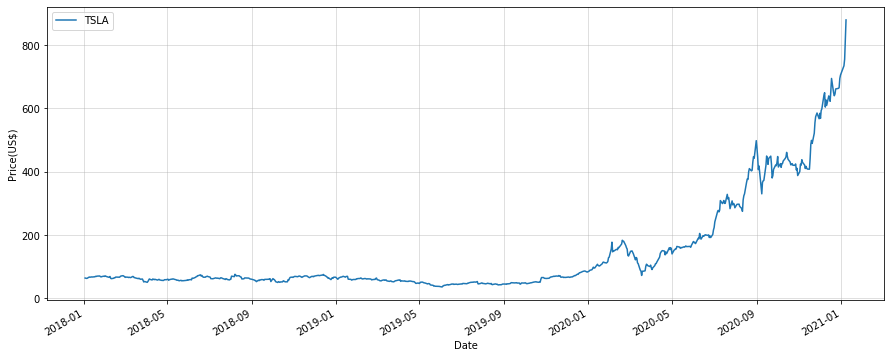

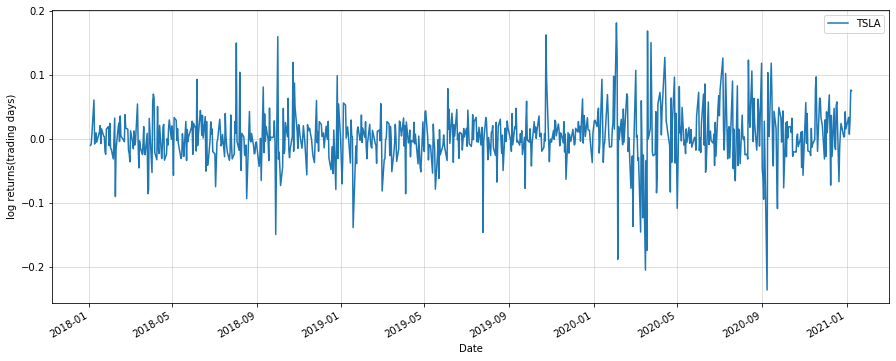

In [22]:
#Calculate historical model
log_returns = np.log(1+data.pct_change()) #pct_change() obtains simple returns from a provided dataset

tickerMu = log_returns.mean()
print('Ticker mean return price is: (US$)', tickerMu)

tickerVariance = log_returns.var()
print('Ticker return price cariance is: (US$)', tickerVariance)

#log_returns.tail
data.plot(figsize=(15,6))
plt.grid(alpha=0.5)
plt.ylabel("Price(US$)")

log_returns.plot(figsize=(15,6))
plt.grid(alpha=0.5)
plt.ylabel("log returns(trading days)")



#### Import Historical data and set up Brownian motion model

##### 1. Calculate drift ($\mu - \frac{1}{2} \cdot var$)

$$
drift = \mu - \frac{1}{2} \cdot var
$$

notes type $\mu$ as $u$ , let coefficient be $\frac{1}{2}$

$\textbf{Glossary}$
Stochastic: having a random probability distribution or pattern that may be analysed statistically but may not be predicted precisely.

In [4]:
drift = tickerMu - (0.5*tickerVariance)
drift

TSLA    0.002525
dtype: float64

##### 2. Calculate Volatility ($stdev \cdot z$)

In [5]:
stdev = log_returns.std()
stdev

TSLA    0.042937
dtype: float64

In [6]:
#Check data type = series and convert to arrays
print(type(drift))
print(type(stdev))

np.array(drift) #or drift.values
np.array(stdev) #or stdev.values

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


array([0.04293664])

In [7]:
Z = norm.ppf(np.random.rand(10,2)) #norm.ppf converts the % into standard deviation #np.random.rand(10,2) creates a 10x2 matrix 
Z

#why 10x2 matrix? haven't used z yet, 10 = 10 iterations

array([[ 0.18513211,  0.37937549],
       [ 0.20784331,  2.37740273],
       [ 0.22756353, -0.47405355],
       [ 1.71156008, -0.19717271],
       [-1.17812255,  0.60892727],
       [ 0.81825921,  0.05987961],
       [ 0.35428222, -0.06159862],
       [ 1.27283336, -0.18398074],
       [ 0.02252083,  0.06073411],
       [-0.27677409,  0.51091055]])

In [8]:
t_intervals = 1000 #next 1000 evolutions
iterations = 100 #10 iterations of the 1000evolutions

<center>
daily returns = $e^r$
</center>
$$
r = drift + stdev \cdot z
$$

In [9]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations))) #what is the matrix multiplication here?
daily_returns #1000X10 array
#can this step be written into a function? to reduce compute

array([[1.10858358, 1.04768535, 1.00801324, ..., 0.97456519, 0.98846732,
        0.99884134],
       [0.99248607, 1.06883617, 0.98100255, ..., 0.97518433, 1.00394205,
        1.06667618],
       [0.97111033, 0.96521783, 0.98282977, ..., 1.0399001 , 0.97564459,
        1.00096814],
       ...,
       [0.97606449, 1.0370386 , 0.95899392, ..., 1.03445713, 0.99096042,
        0.95267243],
       [1.00222762, 1.00194724, 1.007886  , ..., 0.97603082, 0.93894074,
        0.94505393],
       [0.98503395, 1.00681309, 1.0569474 , ..., 1.06392799, 0.98385336,
        0.99720566]])

***
### Random walk with a Markov Chain using on normal distribution of log returns for n-iterations (n=1000)
$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />
$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$

Reference:
- Creating Graphs: https://networkx.org/documentation/stable/tutorial.html

In [10]:
#last extracted stock price to start movement of daily returns
S0 = data.iloc[-1]
S0

TSLA    880.02002
Name: 2021-01-08 00:00:00, dtype: float64

In [11]:
#Create data array loop randomised data and initialise start data
price_list = np.zeros_like(daily_returns) # creates an array of similiar size to another array e.g. daily returns

price_list[0] = S0
#price_list


In [12]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

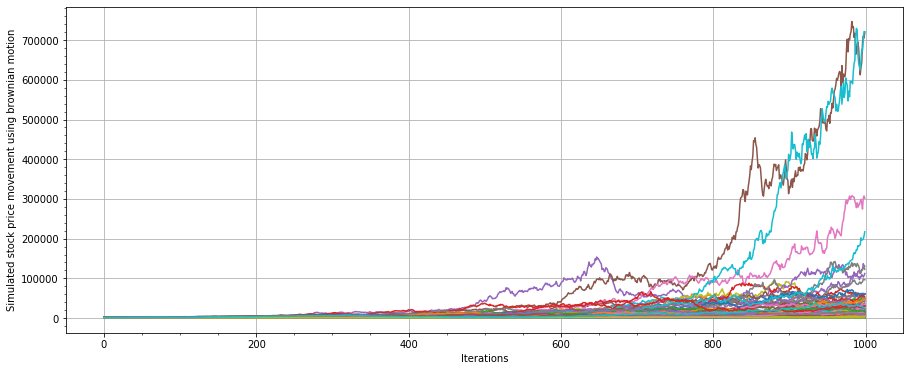

In [27]:
plt.figure(figsize=(15,6))
plt.ylabel("Simulated stock price movement using brownian motion")
plt.xlabel("Iterations")
plt.grid() 
plt.plot(price_list);

### Plot Histogram (showing distribution at $k^{th}$ iteration)

for 1000 iterations counter[0:999]

<function matplotlib.pyplot.show(*args, **kw)>

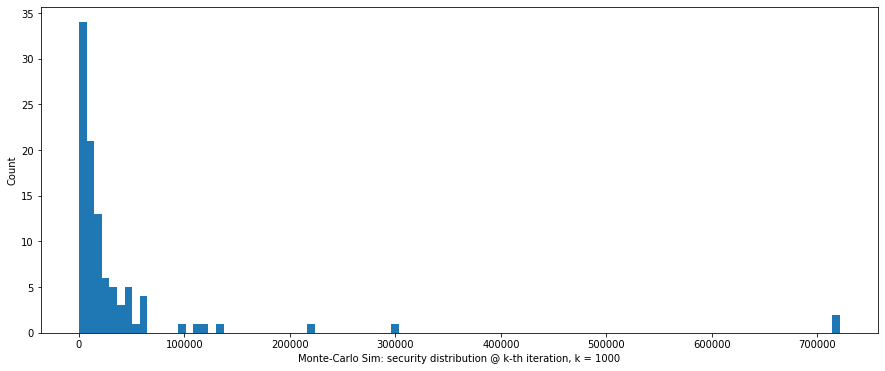

In [14]:
#Define bin size
k = 999
plt.figure(figsize=(15,6))
plt.hist(price_list[k], bins = 100)
plt.xlabel("Monte-Carlo Sim: security distribution @ k-th iteration, k = "+ str(k+1))
plt.ylabel('Count')
plt.show